In [1]:
import os
os.chdir('src')

In [2]:
from ecoli_adjlist_generator import *
import motiffinder as mf
import pandas as pd
import networkx as nx
import pprint
import matplotlib.pyplot as plt

In [3]:
adj_list = open_adj_list_json(ADJLIST_JSON)
graph = default_adj_list_to_graph(adj_list)

In [4]:
def get_transcription_factors():
    #adj_csv = pd.read_csv(CSV_FILE)
    #transcription_factors = adj_csv[adj_csv.ev_level > 1].TF.unique()
    #return transcription_factors
    return list(adj_list.keys())

In [5]:
# Finding SIMs
transcription_factors = get_transcription_factors()
print('TFs' , len(transcription_factors))
sims = mf.find_SIMS(graph,transcription_factors)
print('SIMs', len(sims))

TFs 211
SIMs 211


In [14]:
def draw_subgraph(graph,nodes,**kwargs):
    axes = plt.axes((0,0,1.2,1.2))
    nx.draw(graph.subgraph(nodes),with_labels=True,edge_color='gray',ax=axes,**kwargs)

In [7]:
sims = sorted(filter(lambda x : len(x) > 2, sims), key = lambda x : len(x))
print('SIMs', len(sims))

SIMs 72


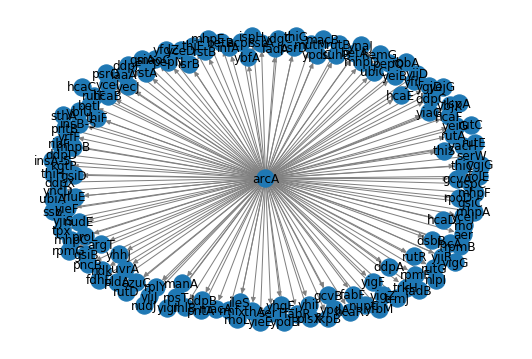

In [15]:
draw_subgraph(graph,sims[71])

In [18]:
print(sims[71])

['rutR', 'rstA', 'ypdB', 'rpsT', 'ribF', 'ileS', 'lspA', 'fkpB', 'ispH', 'yacH', 'lpcA', 'betA', 'betB', 'betI', 'mhpA', 'mhpB', 'mhpC', 'mhpD', 'mhpF', 'mhpE', 'ybfA', 'ybiU', 'iaaA', 'gsiA', 'gsiB', 'gsiC', 'gsiD', 'ybjX', 'macA', 'macB', 'serW', 'infA', 'pncB', 'pepN', 'rmf', 'serT', 'rutG', 'rutF', 'rutE', 'rutD', 'rutC', 'rutB', 'rutA', 'yceI', 'yceJ', 'yceD', 'rpmF', 'plsX', 'acpP', 'fabF', 'nudJ', 'rluE', 'dsbB', 'tpx', 'ynaJ', 'maoC', 'yncD', 'ddpF', 'ddpD', 'ddpC', 'ddpB', 'ddpA', 'ddpX', 'pntB', 'pntA', 'ydgC', 'rstB', 'manA', 'xthA', 'insB-5', 'insA-5', 'uspC', 'yeiB', 'folE', 'yeiG', 'yejG', 'rplY', 'proL', 'yfbM', 'argT', 'yfdZ', 'ypdA', 'ypdC', 'nupC', 'ndk', 'trmJ', 'suhB', 'hcaR', 'hcaE', 'hcaF', 'hcaC', 'hcaB', 'hcaD', 'yfiF', 'kgtP', 'ssrA', 'gcvA', 'ygjD', 'rpoD', 'aer', 'ygjG', 'nlpI', 'nudE', 'yrfF', 'yhgE', 'yhhJ', 'rbbA', 'yhiI', 'yiaG', 'mutM', 'rpmB', 'rpmG', 'yieE', 'yieF', 'rhlB', 'rhoL', 'rho', 'yigF', 'yigG', 'yigI', 'pldA', 'fadA', 'fadB', 'pepQ', 'yigZ', 

In [9]:
dors = mf.find_DORs(graph) # possibly still buggy
print(len(dors))
print(dors)

1
[(('arcA', 'crp'), ('cspA', 'glpR'))]


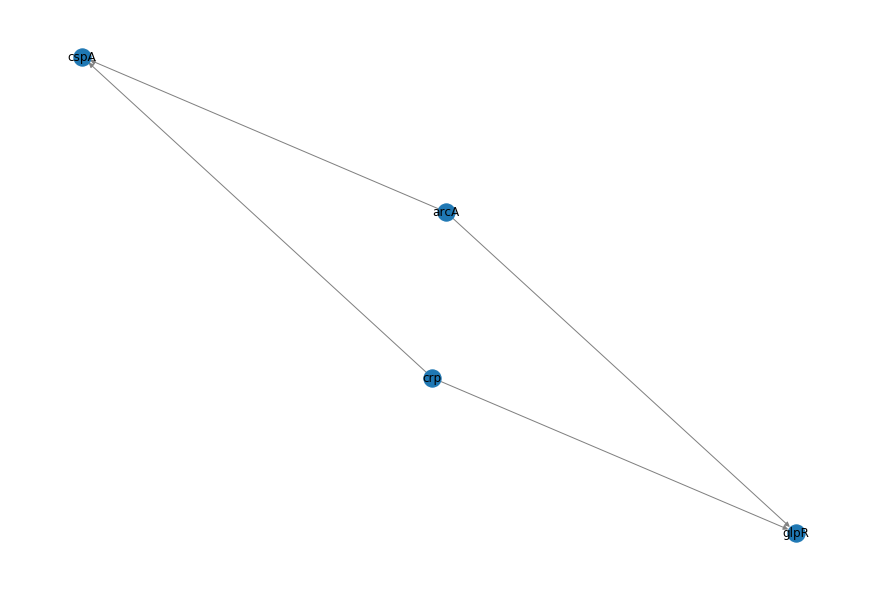

In [10]:
draw_subgraph(graph,dors[0][0] + dors[0][1])

{2: 18, 3: 13, 4: 7, 5: 3, 6: 10, 7: 2, 8: 2, 9: 2, 10: 1, 11: 3, 12: 1, 15: 1, 19: 1, 20: 1, 40: 1, 43: 1, 74: 2, 108: 1, 125: 1, 150: 1}


<BarContainer object of 20 artists>

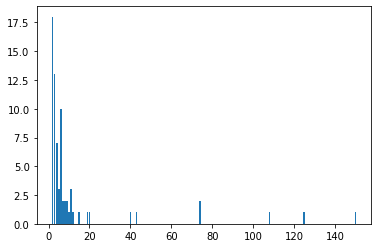

In [11]:
# Distribution of number of genes involved in a SIM (excluding regulator)
size_count = {}
for s in sims:
    size = len(s) - 1
    if size not in size_count:
        size_count[size] = 0
    size_count[size] += 1
print(size_count)
plt.bar(size_count.keys(),size_count.values())

<function networkx.drawing.layout.bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)>